## loading the required packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

## data loading & cleaning

In [33]:
df = pd.read_csv('data/listings.csv')
df2 = pd.read_csv('data/listings-detailed.csv')

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23911 non-null  int64  
 1   name                            23908 non-null  object 
 2   host_id                         23911 non-null  int64  
 3   host_name                       23906 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23911 non-null  object 
 6   latitude                        23911 non-null  float64
 7   longitude                       23911 non-null  float64
 8   room_type                       23911 non-null  object 
 9   price                           23911 non-null  int64  
 10  minimum_nights                  23911 non-null  int64  
 11  number_of_reviews               23911 non-null  int64  
 12  last_review                     

In [35]:

df2=df2.drop(["host_verifications","host_has_profile_pic","host_identity_verified","scrape_id","scrape_id","host_name","host_thumbnail_url","host_picture_url","picture_url","neighbourhood_group_cleansed","bathrooms","calendar_updated"],axis=1)
df2["price"]=df2["price"].apply(lambda x : float(x[1:].replace(",","")))
df2.drop(df2[df2["price"]>=50000].index,axis=0,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23908 non-null  int64  
 1   listing_url                                   23908 non-null  object 
 2   last_scraped                                  23908 non-null  object 
 3   name                                          23905 non-null  object 
 4   description                                   23431 non-null  object 
 5   neighborhood_overview                         15118 non-null  object 
 6   host_id                                       23908 non-null  int64  
 7   host_url                                      23908 non-null  object 
 8   host_since                                    23903 non-null  object 
 9   host_location                                 23868 non-null 

## EDA

In [36]:
df.duplicated().sum()

0

In [37]:
df.isnull().sum()

id                                    0
name                                  3
host_id                               0
host_name                             5
neighbourhood_group               23911
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3941
reviews_per_month                  3941
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           20387
dtype: int64

In [38]:
Long=12
Lat=42
locations = list(zip(df.latitude, df.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

<AxesSubplot:>

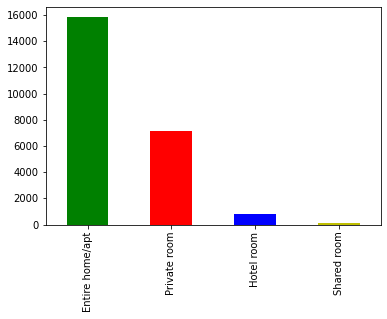

In [39]:
df['room_type'].value_counts().plot(kind = 'bar', color = ['g', 'r', 'b', 'y'])

In [40]:
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

,host_id,host_name,neighbourhood,apartment
3264,23532561,IFlat,I Centro Storico,154
6174,96122546,CleanBnB Team,I Centro Storico,82
623,2405376,Lorenzo,I Centro Storico,51
5435,63191555,Halldis,I Centro Storico,51
8209,224869116,Sonder (Rome),I Centro Storico,48
90,316068,Federico,I Centro Storico,38
291,1107433,WonderWhereToStay,I Centro Storico,36
2955,20428282,Nicoletta,I Centro Storico,36
356,1369759,Angelo,I Centro Storico,33
2328,13766340,Andreas,I Centro Storico,33


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'I Centro Storico'),
  Text(1, 0, 'VII San Giovanni/Cinecittà'),
  Text(2, 0, 'II Parioli/Nomentano'),
  Text(3, 0, 'XIII Aurelia'),
  Text(4, 0, 'XII Monte Verde')])

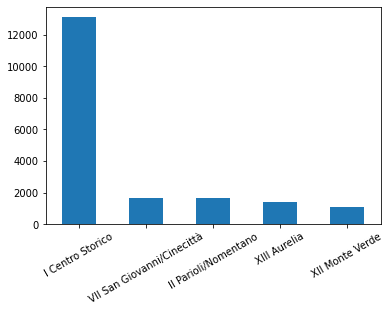

In [41]:
dist_plt = df['neighbourhood'].value_counts().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'I Centro Storico'),
  Text(1, 0, 'XIII Aurelia'),
  Text(2, 0, 'XV Cassia/Flaminia'),
  Text(3, 0, 'II Parioli/Nomentano'),
  Text(4, 0, 'XII Monte Verde')])

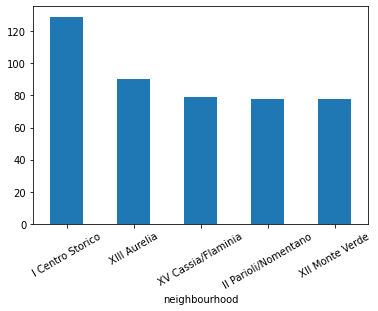

In [42]:
mode_dist_plt = df.groupby('neighbourhood')['price'].median().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'XI Arvalia/Portuense'),
  Text(1, 0, 'I Centro Storico'),
  Text(2, 0, 'II Parioli/Nomentano'),
  Text(3, 0, 'XIII Aurelia'),
  Text(4, 0, 'XV Cassia/Flaminia')])

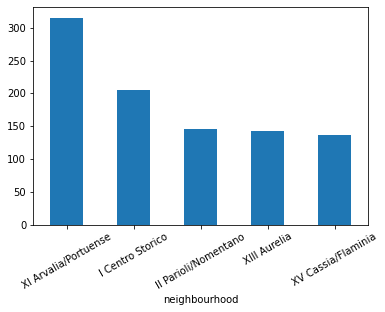

In [43]:
mean_dist_plt = df.groupby('neighbourhood')['price'].mean().nlargest(5).plot.bar()
plt.xticks(rotation = 30)

In [44]:
df['price'].describe()

count    23911.000000
mean       166.658107
std        846.356788
min          0.000000
25%         65.000000
50%        100.000000
75%        157.000000
max      90963.000000
Name: price, dtype: float64

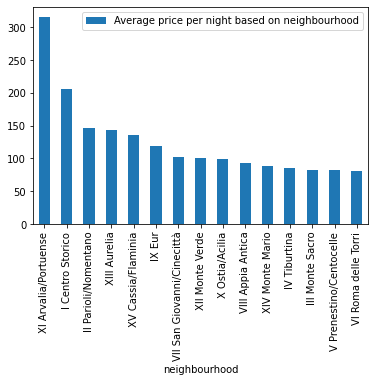

,Average price per night based on neighbourhood
neighbourhood,
XI Arvalia/Portuense,315.661538
I Centro Storico,205.766725
II Parioli/Nomentano,146.295732
XIII Aurelia,143.172439
XV Cassia/Flaminia,136.271222
IX Eur,118.437870
VII San Giovanni/Cinecittà,102.632836
XII Monte Verde,100.791139
X Ostia/Acilia,99.659446


In [45]:
df_mean_dist = df.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",
        ascending=False).rename(index=str, columns={"price": "Average price per night based on neighbourhood"}).head(15)

df_mean_dist.plot(kind='bar')
plt.show()
pd.DataFrame(df_mean_dist)

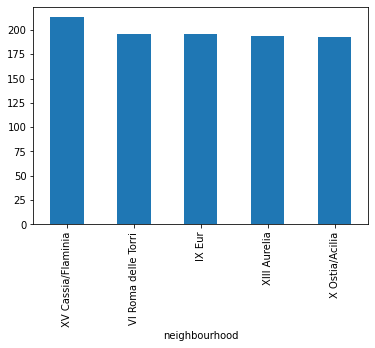

In [46]:
df5 = df.groupby('neighbourhood')['availability_365'].mean().nlargest(5).plot.bar()

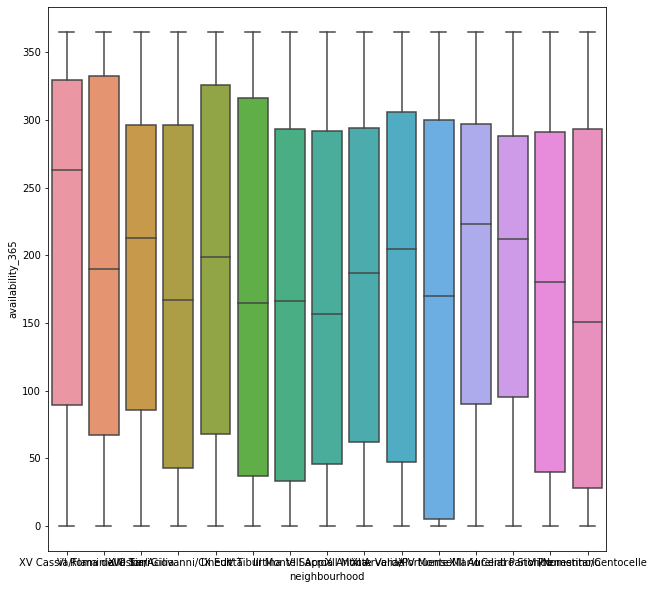

In [47]:


plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood',y='availability_365')

# -----------------------------------------------------

### what is the income of the past year and the expected income for the next 3 months?

- add min_booked_nights_past_12m and min_income_past_12m column to the dataset

In [48]:
romeListings = df2.copy()
#the minimum estmtation of the number of booked nights of each listing in the last 12 month (current date = 2022-06-07)
romeListings["min_booked_nights_past_12m"]=romeListings.apply(lambda x : x["number_of_reviews_ltm"]*x["minimum_nights_avg_ntm"],axis=1)

#the minimum estmtation of the income of each listing in the last 12 month (current date = 2022-06-07)
romeListings["min_income_past_12m"]=romeListings.apply(lambda x : x["min_booked_nights_past_12m"]*x["price"],axis=1)


- add expected_booked_nights_coming_3m and expected_income_coming_3m column to the dataset

In [49]:
#the expected number of booked nights of each listing in the next 3 month (current date = 2022-06-07)
romeListings["expected_booked_nights_coming_3m"]=romeListings.apply(lambda x : 90-x["availability_90"],axis=1)

#the expected income of each listing  in the next 3 month (current date = 2022-06-07)
romeListings["expected_income_coming_3m"]=romeListings.apply(lambda x : (90-x["availability_90"])*x["price"],axis=1)

#### the neighbourhoods with the highest minumam income average for the past 12 months


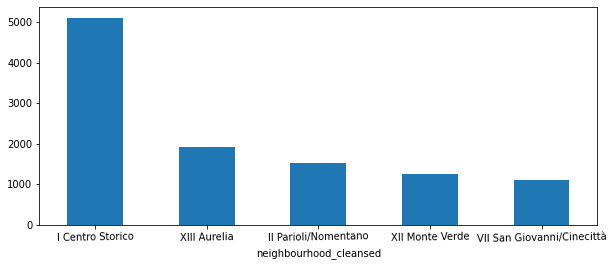

In [50]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("neighbourhood_cleansed")["min_income_past_12m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);


### the neighbourhoods with the highest expected income average for the next 3 months

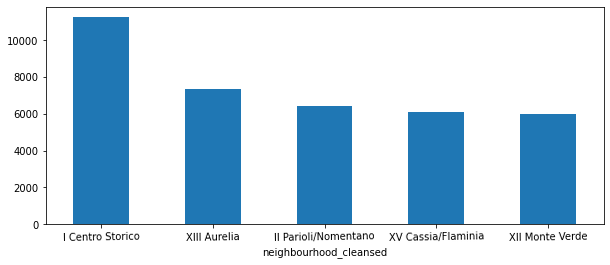

In [51]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("neighbourhood_cleansed")["expected_income_coming_3m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);



#### the room type with the highest minumam income average for the past 12 months


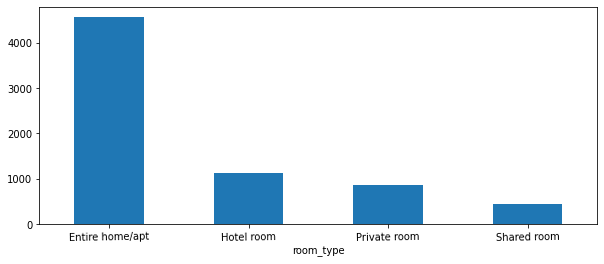

In [52]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("room_type")["min_income_past_12m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);


#### the room type with the highest expected income average for the next 3 months

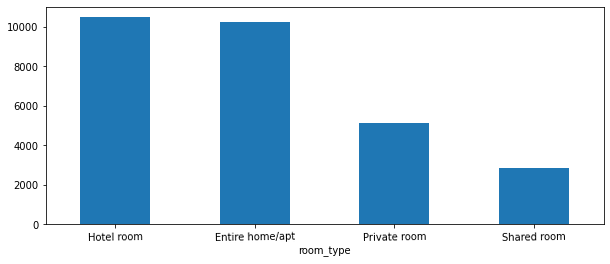

In [53]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
romeListings.groupby("room_type")["expected_income_coming_3m"].mean().sort_values(ascending=False).head(5).plot(kind='bar', rot=1);


#### how many listings per host?

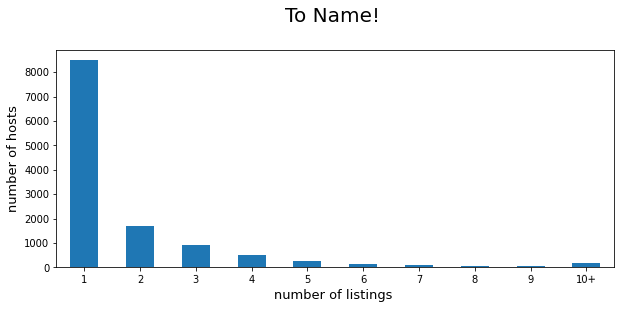

In [54]:
fig = plt.figure(figsize=(10,4))
ax = fig.gca()
nListingsPerHostCount=df.groupby("host_id")["calculated_host_listings_count"].mean().value_counts()
nListingsPerHostCount[10]= nListingsPerHostCount[10:].sum()
nListingsPerHostCount.drop(nListingsPerHostCount.index[10:],inplace=True)
nListingsPerHostCount=nListingsPerHostCount.reset_index()
nListingsPerHostCount["index"]=["1","2","3","4","5","6","7","8","9","10+"]
nListingsPerHostCount.set_index(nListingsPerHostCount["index"],inplace=True)
nListingsPerHostCount["calculated_host_listings_count"].plot(kind='bar', rot=1)
ax.set_title('To Name! \n', fontsize=20)
ax.set_xlabel("number of listings ",fontsize=13)
ax.set_ylabel("number of hosts",fontsize=13);